In [61]:
import pandas as pd
df = pd.read_csv('full_taggeddataset.csv').dropna()
#df = df[df.genre != 'NEWS-P4']
#df = df[df.region != 'NEWS']

In [62]:
df.head()

,Unnamed: 0,Unnamed: 0.1,corpus,genre,lemmas,period,pos_tags,region,title,tokens,year
0,0,0,manchester,NEWS,aus die Braunschweigische . an die lieb Landle...,P3,APPR ART NA SENT APPR ART ADJA NN SENT PPOSAT ...,NOD,wolfenbuettel1.txt,Aus dem Braunschweigischen . An die lieben Lan...,1786
1,1,1,manchester,DRAM,"Ei was Schaath er die , wenn im grün Gruß unse...",P2,"ITJ PWS NE PPER PDS $, KOUS APPRART ADJA NN PP...",WMD,Bookesbeutel.txt,"Ey was schadt ihm das , Wenn im gruͤnen Graß U...",1742
2,2,2,manchester,LEGA,von die Aiden die Cammer-Gerichts-Persohnen un...,P2,"APPR ART NN ART NN KON NN $, ADV PAV PTKZU VVI...",WMD,GesetzBuch.txt,Von den Eyden der Cammer-Gerichts-Persohnen un...,1724
3,3,3,manchester,SERM,Abhandlung . die heutig Freytag sein derjenige...,P2,"NN SENT ART ADJA NE VAFIN PDS NN $, APPR PRELS...",WMD,HeilBronnen.txt,Abhandlung . DEr heutige Freytag ist derjenige...,1721
4,4,4,manchester,NEWS,Madrid / die September . an Don Manuel Arias ...,P2,"NE $, ART CARD NN SENT APPR NE NE NE NN APPR N...",WMD,hanau2.txt,Madritt / den 8. Septembris . An Don Manuel Ar...,1701


In [63]:
df.shape

(965, 11)

<span style="color:red">**<<<<<<< local**</span>

In [64]:
import re
import numpy as np
from matplotlib import pyplot as plt

print(np.mean([len(re.split(r'\W+', lemmas)) for lemmas in df.lemmas]))
print(np.std([len(re.split(r'\W+', lemmas)) for lemmas in df.lemmas]))
print(np.median([len(re.split(r'\W+', lemmas)) for lemmas in df.lemmas]))

1576.8227979274611
770.9167590787224
2025.0


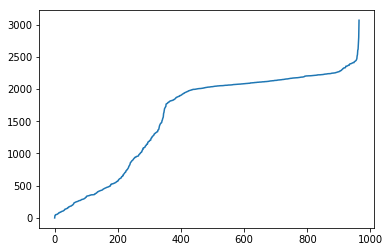

In [65]:
plt.plot(list(range(len(df.lemmas))), sorted([len(re.split(r'\W+', lemmas)) for lemmas in df.lemmas]))

In [66]:
df['text_length'] = [len(re.split(r'\W+', lemmas)) for lemmas in df.lemmas]

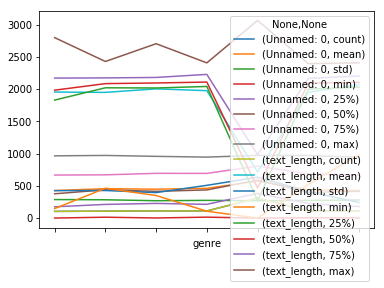

In [67]:
df.groupby(['genre']).describe().plot()

<span style="color:red">**=======**</span>

<span style="color:red">**>>>>>>> remote**</span>

# Plot genre distribution

Text(0.5,0,'Textsorten')

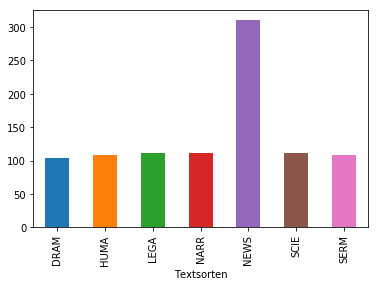

In [68]:
df.groupby('genre').title.count().plot(kind='bar').set_xlabel('Textsorten')

=> One text has an invalid genre this should occur while creating the dataset.

=> Every genre except news is somewhat balanced. Maybe we should try applying class weights.

# Plot region distribution

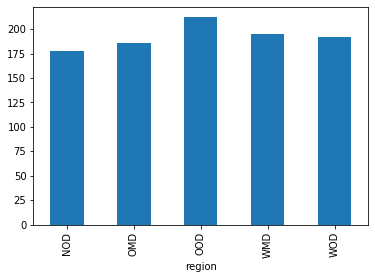

In [11]:
df.groupby('region').title.count().plot(kind='bar')

=> 1801 is an invalid entry. We should really fix the dataset creation.

CHECK: Is NOD similar to NoD?

# Plot number of text per year

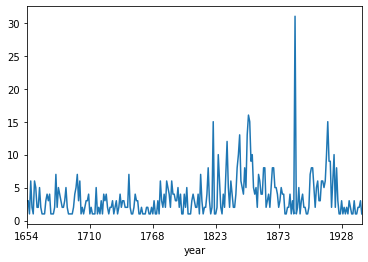

In [12]:
df.groupby('year').title.count().plot()

In [13]:
df.year.value_counts().describe()

count    267.000000
mean       3.606742
std        3.281131
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       31.000000
Name: year, dtype: float64

In [14]:
df_1886 = df[df.year == df.year.value_counts().idxmax()]
df_1886

,Unnamed: 0,Unnamed: 0.1,tokens,pos_tags,lemmas,title,genre,period,region,year,corpus,text_length
669,669,333,* [ Mißhandlung . ] Eine bedauerliche Scene sp...,XY $( NN $. $( ART ADJA NN VVFIN PRF ADV ADV A...,* [ Misshandlung . ] eine bedauerlich Scene sp...,Danziger,NEWS,P5,NOD,1886,innsbruck,113
670,670,334,"* Hamburg , den 6 . August . – Submissionen . ...","XY NE $, ART CARD $. NE $. $( NN $. ART NN ART...","* Hamburg , die @card@ . August . - Submission...",Hamburger,NEWS,P5,NOD,1886,innsbruck,895
671,671,335,Local = Nachrichten . * Se . Majestät der Köni...,NE $( NN $. XY FM $. NN ART NE NE APPR NE VVFI...,Local = Nachricht . * se . Majestät die König ...,Hannoverscher,NEWS,P5,NOD,1886,innsbruck,436
672,672,336,Königsberger Nachrichten . ⊙ Aus Pillau geht u...,"NE NN $. ADJA NN NN VVFIN PPER ART NN PTKVZ $,...",Königsberger Nachricht . ⊙ Aus Pillau gehen wi...,Königsberger,NEWS,P5,NOD,1886,innsbruck,1190
673,673,337,Aus dem Fürstenthum Lippe und Umgegend . Detmo...,"APPR ART NN NN KON NN $. NE $, CARD $. NE $. $...",aus die Fürstenthum Lippe und Umgegend . Detmo...,Lippische,NEWS,P5,NOD,1886,innsbruck,1230
674,674,338,"Vermischtes . Osterburg , 5 . August . Vor ein...","NN $. NN $, CARD $. NE $. APPR PIAT NN VVFIN A...","Vermischte . Osterburg , @card@ . August . vor...",Neue,NEWS,P5,NOD,1886,innsbruck,548
675,675,339,♀ [ Vom Zuggraben . ] In der Nacht zum 30 . v....,NN $( APPRART NN $. $( APPR ART NN APPRART CAR...,♀ [ von die Zuggraben . ] in die Nacht zu die ...,Ostpreu·ische,NEWS,P5,NOD,1886,innsbruck,438
676,676,340,"Locales und Provinzielles . * Stettin , 7 . Au...","NN KON NN $. XY NE $, CARD $. NE $. APPR ART N...","Locales und Provinzielle . * Stettin , @card@ ...",Ostsee,NEWS,P5,NOD,1886,innsbruck,537
677,677,341,Aus den Provinzen . Vermischtes aus Pommern . ...,APPR ART NN $. NN APPR NN $. APPR NE VVFIN APP...,aus die Provinz . Vermischte aus Pommer . in S...,Pommersche,NEWS,P5,NOD,1886,innsbruck,232
678,678,342,"— Von dem Holzlager des Baumeisters Fischer , ...","$, APPR ART NN ART NN NE $, NE $, VAFIN APPR A...","— von die Holzlager die Baumeister Fischer , A...",Pommersche,NEWS,P5,NOD,1886,innsbruck,187


# Plot genre by region

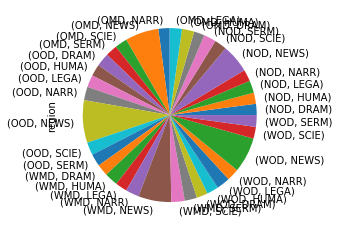

In [15]:
df.groupby(['region', 'genre']).region.count().plot(kind='pie')

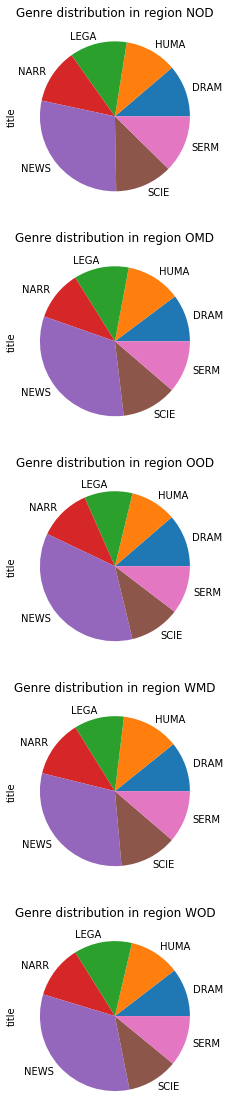

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(df.region.unique()), figsize=(20, 20))
for i, region in enumerate(df.region.unique()):
    df[df.region == region].groupby('genre').title.count().plot(kind='pie',
                                                                ax=axs[i],
                                                                grid=True,
                                                                title=f'Genre distribution in region {region}')

# Plot genre by period

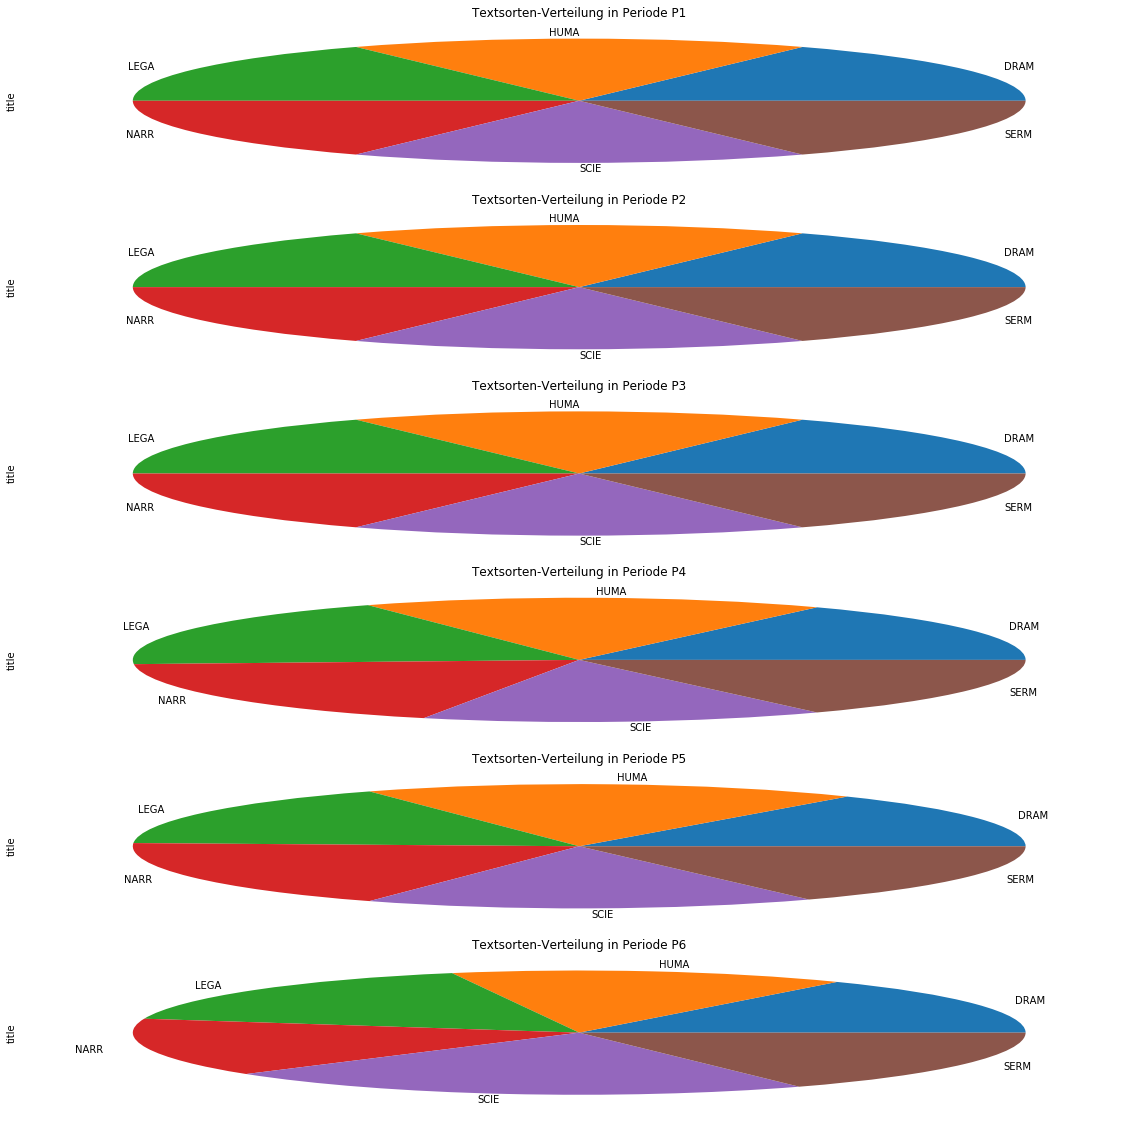

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(df.period.unique()), figsize=(20, 20))
for i, period in enumerate(df.period.unique()):
    df[df.period == period].groupby('genre').title.count().plot(kind='pie',
                                                                ax=axs[i],
                                                                grid=True,
                                                                legend=False,
                                                                title=f'Textsorten-Verteilung in Periode {period}')

In [18]:
df.groupby(['period', 'genre']).describe()

Unnamed: 0                                                       \
                  count        mean        std    min     25%    50%     75%   
period genre                                                                   
P1     DRAM        15.0    7.000000   4.472136    0.0    3.50    7.0   10.50   
       HUMA        15.0   52.000000   4.472136   45.0   48.50   52.0   55.50   
       LEGA        15.0   97.000000   4.472136   90.0   93.50   97.0  100.50   
       NARR        15.0  142.000000   4.472136  135.0  138.50  142.0  145.50   
       NEWS        25.0  192.000000   7.359801  180.0  186.00  192.0  198.00   
       SCIE        15.0  253.000000   4.472136  246.0  249.50  253.0  256.50   
       SERM        15.0  298.000000   4.472136  291.0  294.50  298.0  301.50   
P2     DRAM        15.0   22.000000   4.472136   15.0   18.50   22.0   25.50   
       HUMA        15.0   67.000000   4.472136   60.0   63.50   67.0   70.50   
       LEGA        15.0  112.000000   4.472136  105.0  108.50  112.0  115.50   
       NARR        15.0  157.000000   4.472136  150.0  153.50  157.0  160.50   
       NEWS        23.0  216.000000   6.782330  205.0  210.50  216.0  221.50   
       SCIE        15.0  268.000000   4.472136  261.0  264.50  268.0  271.50   
       SERM        15.0  313.000000   4.472136  306.0  309.50  313.0  316.50   
P3     DRAM        15.0   37.000000   4.472136   30.0   33.50   37.0   40.50   
       HUMA        15.0   82.000000   4.472136   75.0   78.50   82.0   85.50   
       LEGA        15.0  127.000000   4.472136  120.0  123.50  127.0  130.50   
       NARR        15.0  172.000000   4.472136  165.0  168.50  172.0  175.50   
       NEWS        18.0  236.500000   5.338539  228.0  232.25  236.5  240.75   
       SCIE        15.0  283.000000   4.472136  276.0  279.50  283.0  286.50   
       SERM        15.0  328.000000   4.472136  321.0  324.50  328.0  331.50   
P4     DRAM        22.0  346.500000   6.493587  336.0  341.25  346.5  351.75   
       HUMA        23.0  369.913043   6.927633  358.0  364.50  370.0  375.50   
       LEGA        25.0  394.000000   7.359801  382.0  388.00  394.0  400.00   
       NARR        25.0  419.040000   7.430119  407.0  413.00  419.0  425.00   
       NEWS       107.0  487.299065  31.398298  434.0  460.50  487.0  514.50   
       SCIE        20.0  551.500000   5.916080  542.0  546.75  551.5  556.25   
       SERM        22.0  572.500000   6.493587  562.0  567.25  572.5  577.75   
P5     DRAM        18.0  592.500000   5.338539  584.0  588.25  592.5  596.75   
       HUMA        22.0  612.500000   6.493587  602.0  607.25  612.5  617.75   
       LEGA        20.0  633.500000   5.916080  624.0  628.75  633.5  638.25   
       NARR        22.0  654.500000   6.493587  644.0  649.25  654.5  659.75   
       NEWS        83.0  708.000000  24.103942  667.0  687.50  708.0  728.50   
       SCIE        20.0  759.500000   5.916080  750.0  754.75  759.5  764.25   
       SERM        20.0  780.750000   6.576473  770.0  775.75  780.5  786.25   
P6     DRAM        19.0  801.000000   5.627314  792.0  796.50  801.0  805.50   
       HUMA        18.0  821.333333   5.625572  811.0  817.25  821.5  825.75   
       LEGA        21.0  842.571429   6.645084  832.0  837.00  843.0  848.00   
       NARR        19.0  863.000000   5.627314  854.0  858.50  863.0  867.50   
       NEWS        53.0  899.000000  15.443445  873.0  886.00  899.0  912.00   
       SCIE        27.0  939.000000   7.937254  926.0  932.50  939.0  945.50   
       SERM        21.0  963.000000   6.204837  953.0  958.00  963.0  968.00   

                    text_length                                            \
                max       count         mean         std     min      25%   
period genre                                                                
P1     DRAM    14.0        15.0  2174.066667  183.320744  1918.0  2025.50   
       HUMA    59.0        15.0  2084.200000   78.648585  1912.0  2040.50   
       LEGA   104.0        